### Import your librares

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

### Load your dataset

In [22]:
df = pd.read_csv('seattle_weather.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


### Handle missing data in PRCP and RAIN columns

In [23]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [24]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [25]:
prcp_mean = df['PRCP'].mean()
df['PRCP'].fillna(prcp_mean, inplace=True)
rain_mode = df['RAIN'].mode()[0]
df['RAIN'].fillna(rain_mode, inplace=True)
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


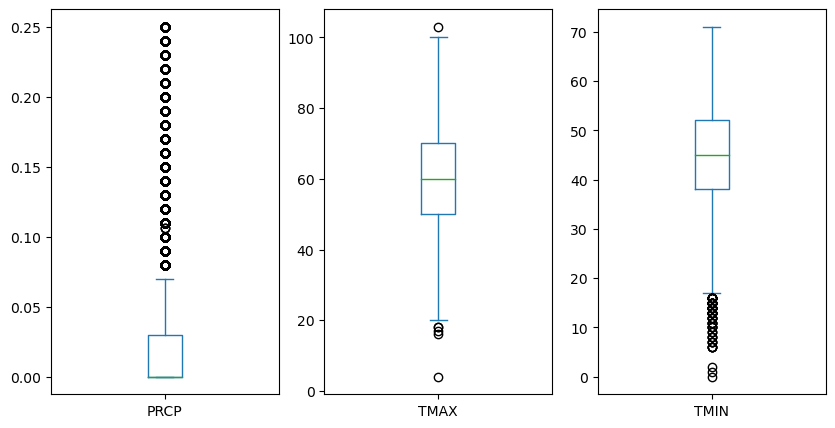

In [27]:
df.plot(kind ='box', subplots=True,figsize=(10,5));

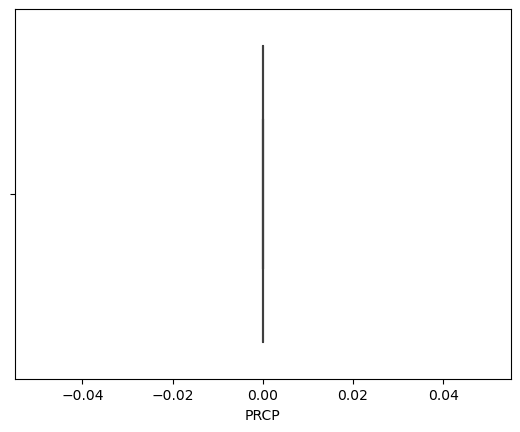

In [29]:
Q1 = df.PRCP.quantile(0.25)
Q3 = df.PRCP.quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df.drop(df[(df["PRCP"] > upper)].index, inplace=True)
sns.boxplot(x = df["PRCP"]);

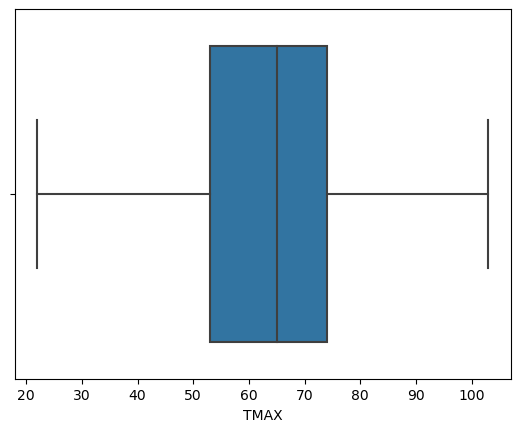

In [30]:
Q1 = df.TMAX.quantile(0.25)
Q3 = df.TMAX.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
df.drop(df[(df["TMAX"] < lower)].index, inplace=True)
sns.boxplot(x = df["TMAX"]);

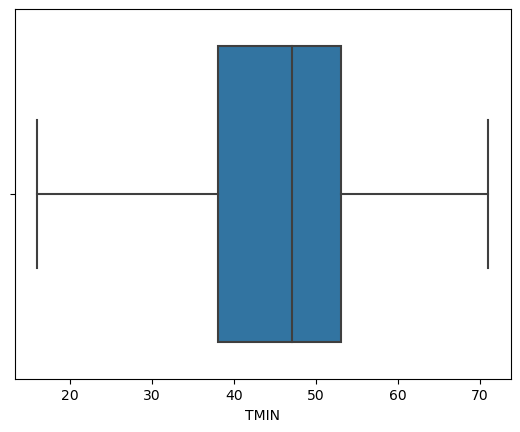

In [31]:
Q1 = df.TMIN.quantile(0.25)
Q3 = df.TMIN.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
df.drop(df[(df["TMIN"] < lower)].index, inplace=True)
sns.boxplot(x = df["TMIN"]);

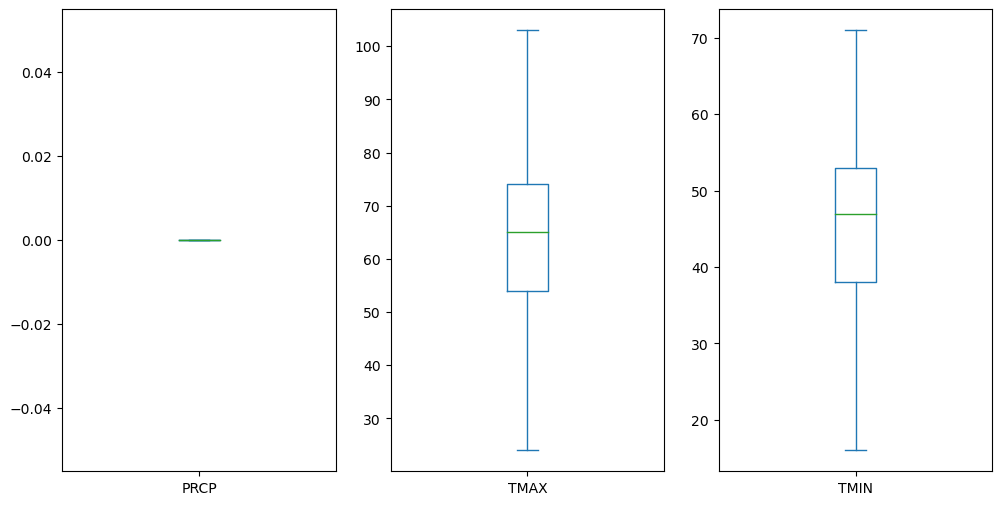

In [32]:
df.plot(kind ='box', subplots=True,figsize=(12,6));
